# Part I: Scraping MTG Card Decks


I will be scraping built decks from EDHRec.

In [1]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import re
import time
import pandas as pd
import mtgutilities as mtgu
import json
from selenium.webdriver.common.by import By
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.chrome.options import Options
import requests

In [2]:
with open('config.json', 'r') as config_file:
    contents = json.loads(config_file.read())

### Getting all of the expansion URLs

In [3]:
COMMANDERS_COLORS_URL = 'https://edhrec.com/commanders/'
COMMANDERS_COLORS = ['w', 'u', 'b', 'g', 'r', 'colorless', 'wu', 'ub', 'br', 'rg', 'gw', 'wb', 'ur', 'bg', 'wr', 'gu', 'wub', 'ubr'\
    'brg', 'rgw', 'gwu', 'wbg', 'uwr', 'bgu', 'rwb', 'gur', 'wubr', 'ubrg', 'brgw', 'rgwu', 'gwub', 'wubrg']
commanders_color_urls = [f"{COMMANDERS_COLORS_URL}{commander_color}" for commander_color in COMMANDERS_COLORS if commander_color=='b']

for commander_url in commanders_color_urls:
    # Enter each commander color site, click Text View
    print(commander_url)
    chrome_options = webdriver.ChromeOptions()
    opts = Options()
    opts.add_argument("user-agent=whatever you want")
    opts.add_argument("--incognito")
    driver = webdriver.Chrome(contents["chrome-driver-location"], options=opts)
    driver.get(commander_url)
    mtgu.click_element_in_href(driver, 'Text View')
    time.sleep(2)

    # Clicking Read More to reveal all commanders
    elements = driver.find_elements(By.CSS_SELECTOR, "button.btn.btn-primary")
    while len(elements)>1:
        try:
            element = driver.find_elements(By.CSS_SELECTOR, "button.btn.btn-primary")[1]
            element.click()
            time.sleep(2)
        except IndexError:
            break
    
    # Scraping Commanders
    a = driver.page_source
    soup = bs(a, features="html.parser")

    commanders = []
    for c in soup.find_all('a', href=True):
        if f"/commanders/" in c["href"]:
            commanders.append(c['href'][1:])
        

    #commanders = ['/krrik-son-of-yawgmoth']
    for commander in commanders[:2]:
        soup_commander = mtgu.get_soup_from_website(f"{COMMANDERS_COLORS_URL}{commander}", options=True)
        time.sleep(3)

        while True:
            for a in soup.find_all('a', href=True):
                if '/deckpreview/' in a["href"]:
                    deck_id = a["href"]  

            if mtgu.check_exists_by_xpath(driver, "//a[contains(text(), 'Next')]"):
                element = driver.find_element(By.XPATH, "//a[contains(text(), 'Next')]")
                driver.execute_script('arguments[0].scrollIntoView();', element)
                driver.execute_script('window.scrollBy(0, -200);')
                element.click()
            else:
                print('No next page!')
                break
            time.sleep(2)

https://edhrec.com/commanders/b


NameError: name 'response' is not defined

<html lang="en"><head><meta charset="utf-8"/><style type="text/css">:root, :host {
  --fa-font-solid: normal 900 1em/1 "Font Awesome 6 Solid";
  --fa-font-regular: normal 400 1em/1 "Font Awesome 6 Regular";
  --fa-font-light: normal 300 1em/1 "Font Awesome 6 Light";
  --fa-font-thin: normal 100 1em/1 "Font Awesome 6 Thin";
  --fa-font-duotone: normal 900 1em/1 "Font Awesome 6 Duotone";
  --fa-font-brands: normal 400 1em/1 "Font Awesome 6 Brands";
}

svg:not(:root).svg-inline--fa, svg:not(:host).svg-inline--fa {
  overflow: visible;
  box-sizing: content-box;
}

.svg-inline--fa {
  display: var(--fa-display, inline-block);
  height: 1em;
  overflow: visible;
  vertical-align: -0.125em;
}
.svg-inline--fa.fa-2xs {
  vertical-align: 0.1em;
}
.svg-inline--fa.fa-xs {
  vertical-align: 0em;
}
.svg-inline--fa.fa-sm {
  vertical-align: -0.0714285705em;
}
.svg-inline--fa.fa-lg {
  vertical-align: -0.2em;
}
.svg-inline--fa.fa-xl {
  vertical-align: -0.25em;
}
.svg-inline--fa.fa-2xl {
  vertical-a
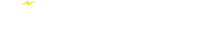

In [4]:
soup_commander